Nama : Mawar Wiliyanti<br>
NIM : 211351080<br>
Kelas : IF Pagi A


#Import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mawarwiliyanti","key":"9b36d17610bd35878637447fafbdf7e9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.0MB/s]


In [4]:
!mkdir pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip -d pima-indians-diabetes-database
!ls pima-indians-diabetes-database

Archive:  pima-indians-diabetes-database.zip
  inflating: pima-indians-diabetes-database/diabetes.csv  
diabetes.csv


# Import library yang digunakan

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pb
import missingno as msno
import statistics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data discovery

In [82]:
df= pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [83]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [86]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1


In [87]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [88]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [89]:
df['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [90]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [91]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [92]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [93]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [94]:
df['DiabetesPedigreeFunction'].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [95]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

# EDA (Minimal 5)

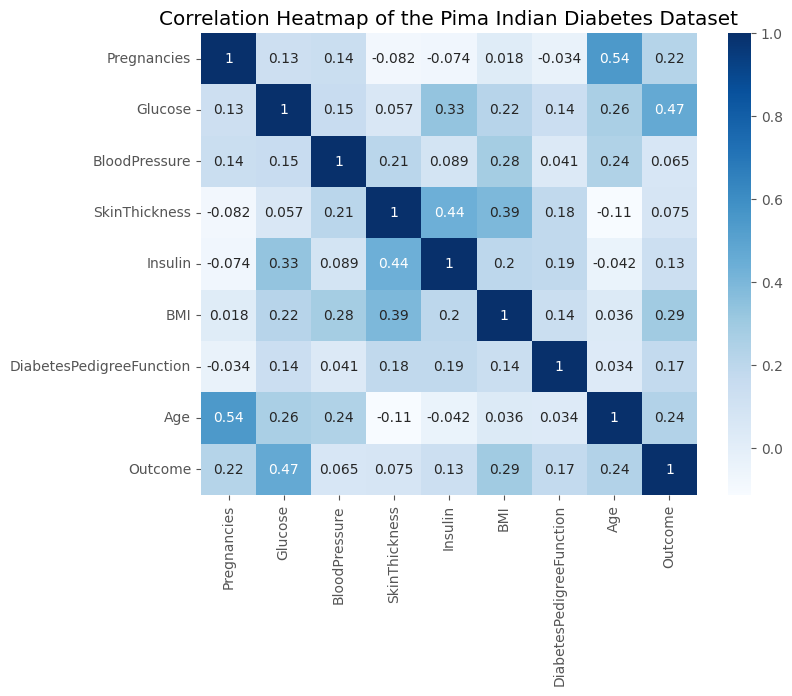

In [96]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.title('Correlation Heatmap of the Pima Indian Diabetes Dataset')
plt.show()

array([<Axes: ylabel='Outcome'>], dtype=object)

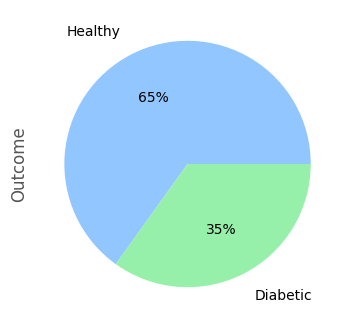

In [97]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(4,4))

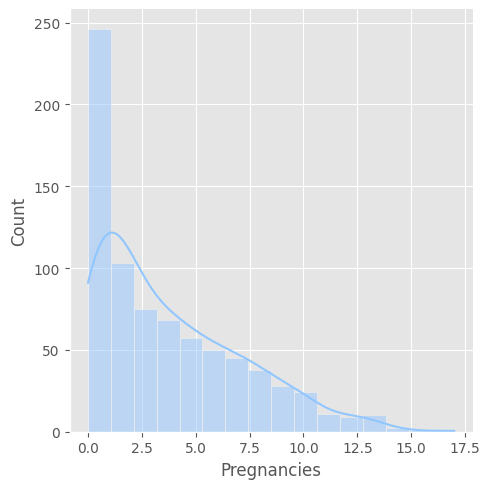

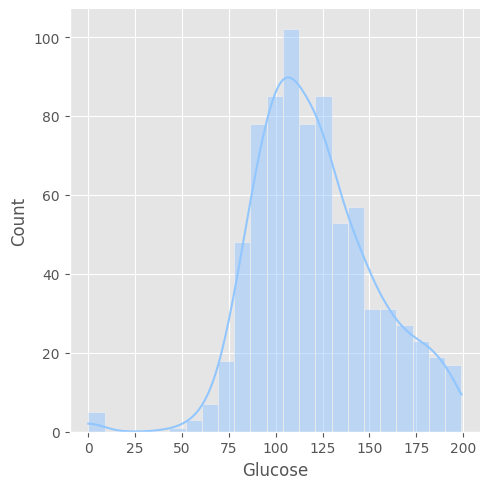

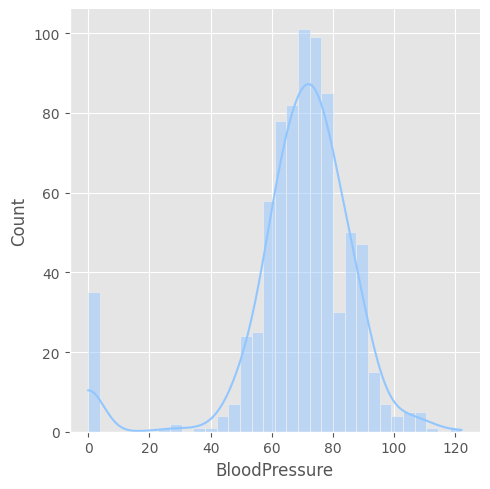

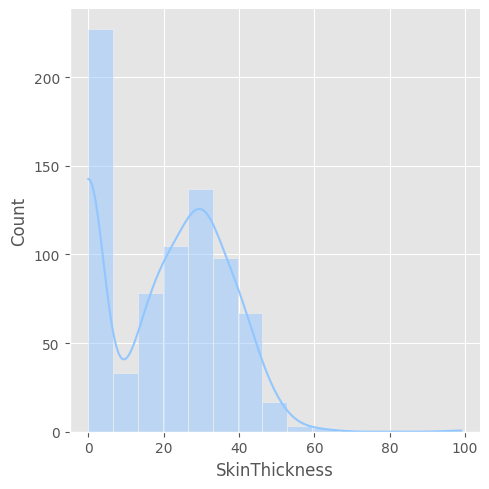

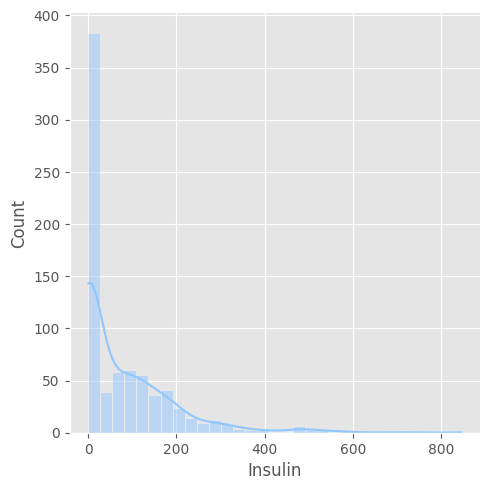

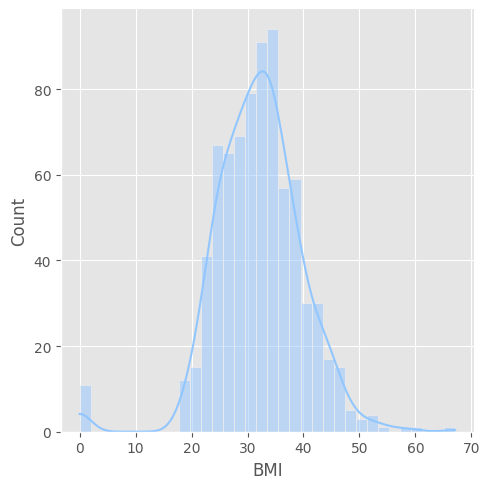

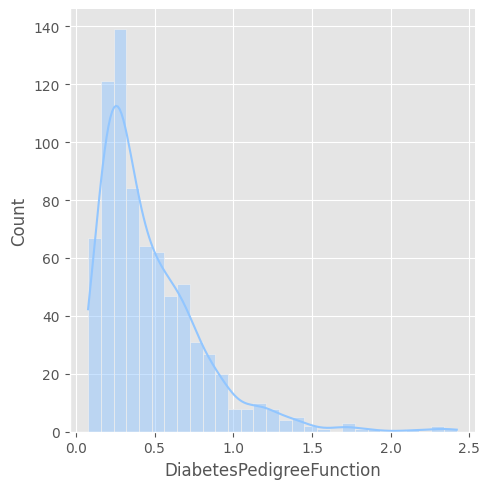

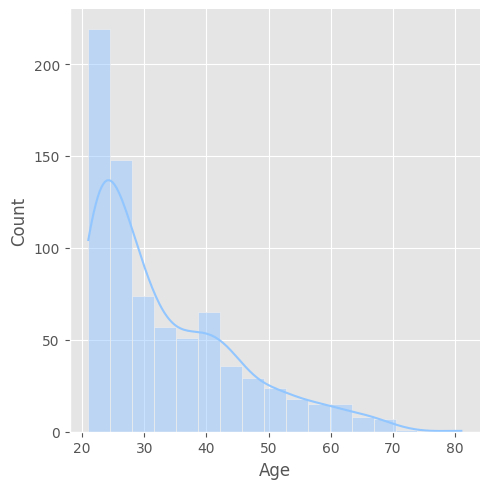

In [98]:
import seaborn as sns
for i in df.columns[0:-1] :
    sns.displot(data=df, x=i, kde=True)

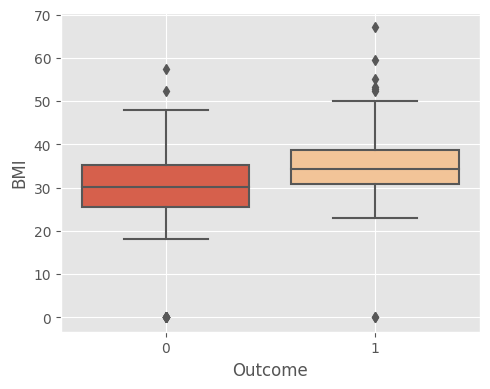

In [99]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['BMI'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

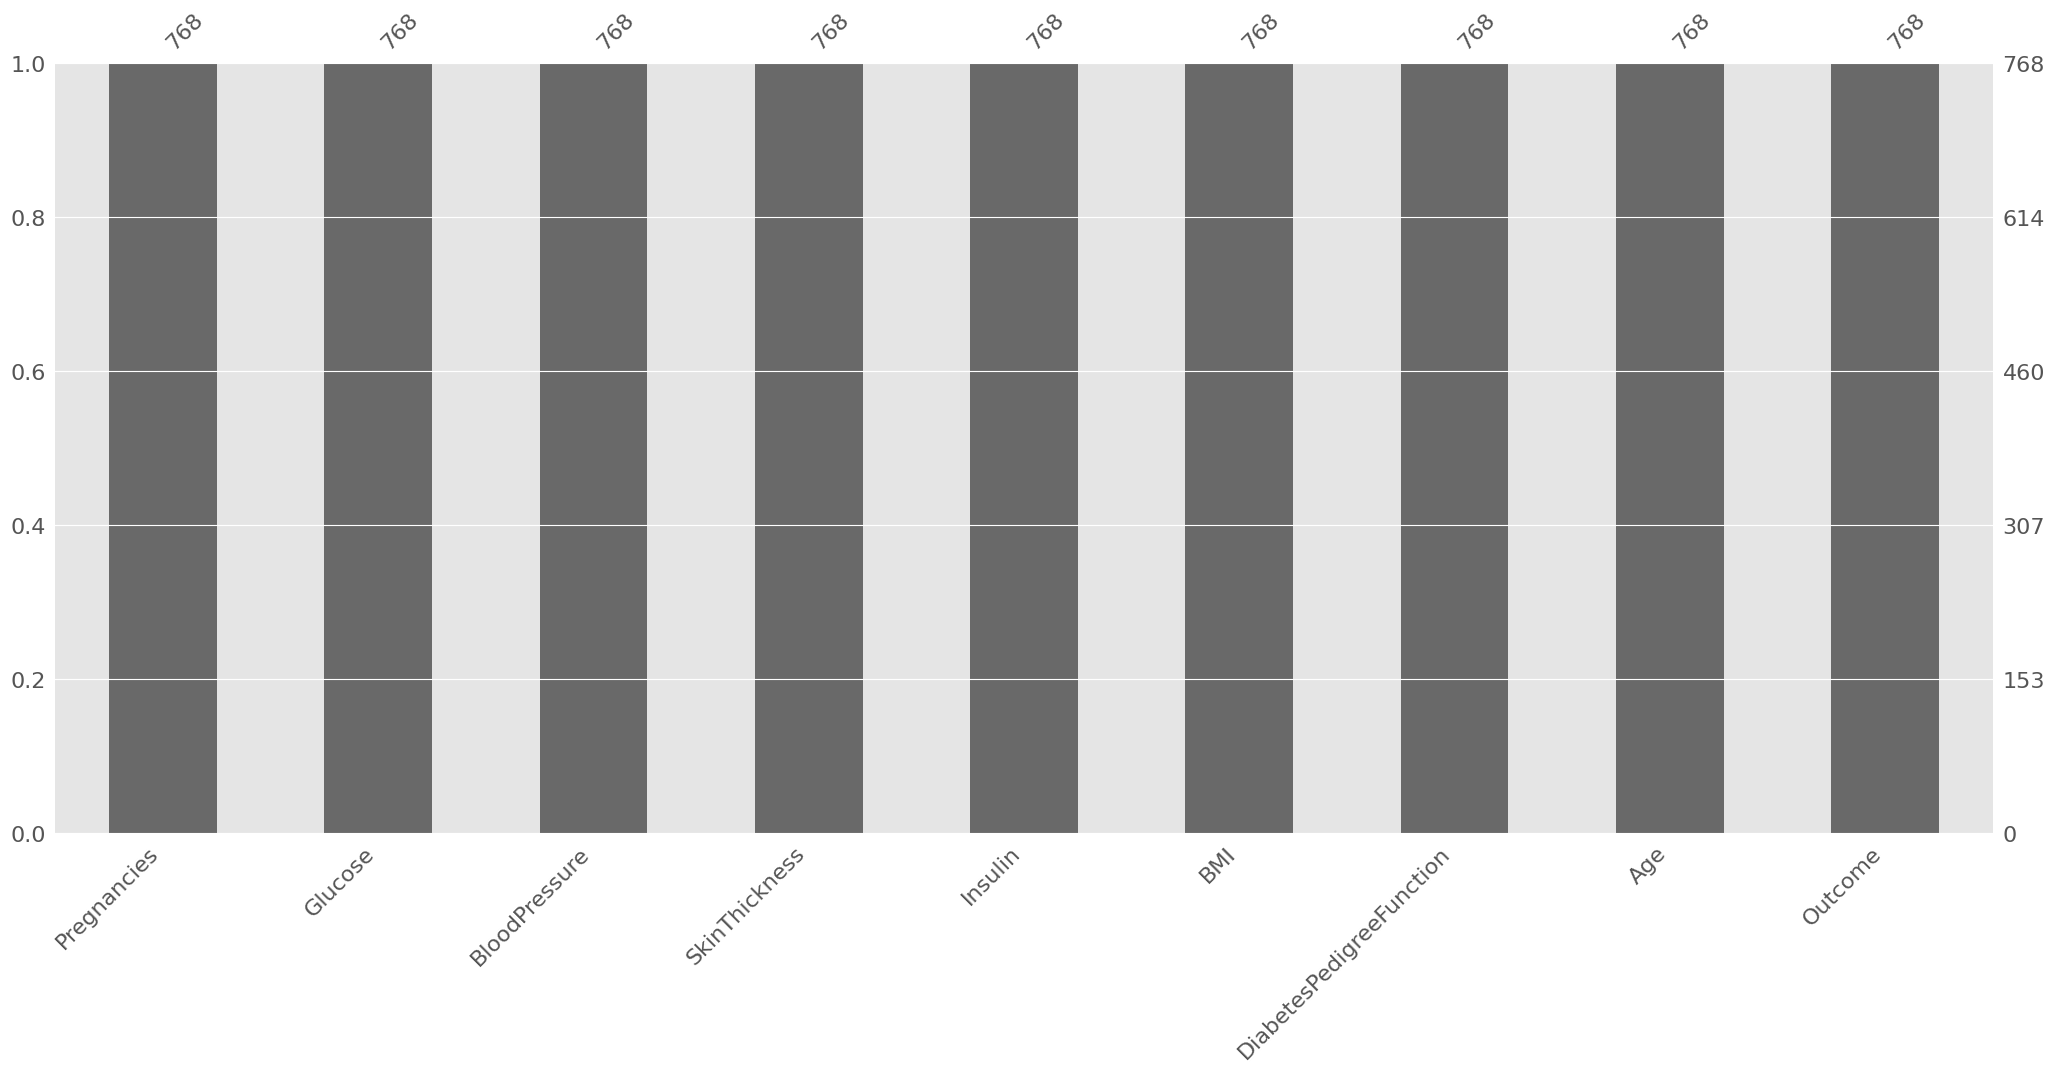

In [100]:
import missingno as msno
msno.bar(df);

# Data Preparation

In [101]:
numerical = []
catgcols = []

for col in df.columns:
  if df[col].dtype=="float64":
    numerical.append(col)
  else:
    catgcols.append(col)

  for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode(), inplace=True)

In [102]:
numerical

['BMI', 'DiabetesPedigreeFunction']

In [103]:
catgcols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'Outcome']

In [104]:
print(df.shape)

(768, 9)


In [105]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [106]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',	'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df[features]
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


# Modelling

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

test_accuracies = []
train_accuracies = []

for n_neighbors in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    train_accuracies.append(knn.score(X_train,y_train))
    test_accuracies.append(knn.score(X_test,y_test))

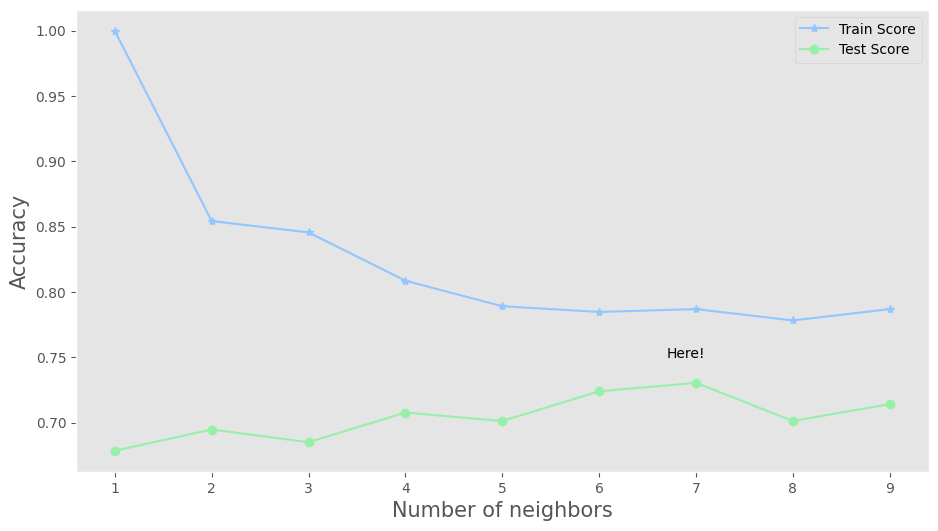

In [110]:
plt.figure(figsize=(11,6))

plt.plot(range(1, 10),train_accuracies,marker='*',label='Train Score')
plt.plot(range(1, 10),test_accuracies,marker='o',label='Test Score')
plt.xlabel('Number of neighbors',size='15')
plt.ylabel('Accuracy',size='15')
plt.text(6.7,0.75, 'Here!')
plt.grid()
plt.legend()
plt.show()

In [111]:
knn = KNeighborsClassifier(n_neighbors=7)

In [112]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [113]:
print('Akurasi =', knn.score(X_test,y_test))

Akurasi = 0.7305194805194806


In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[165  36]
 [ 47  60]]


Predicted,0,1,All
Actual,,,
0,165,36,201
1,47,60,107
All,212,96,308


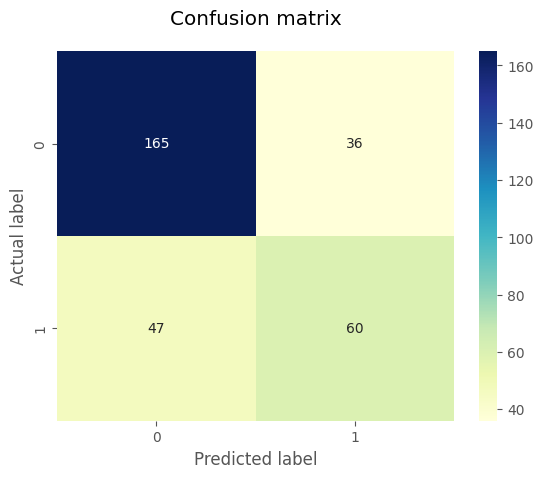

In [115]:
sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

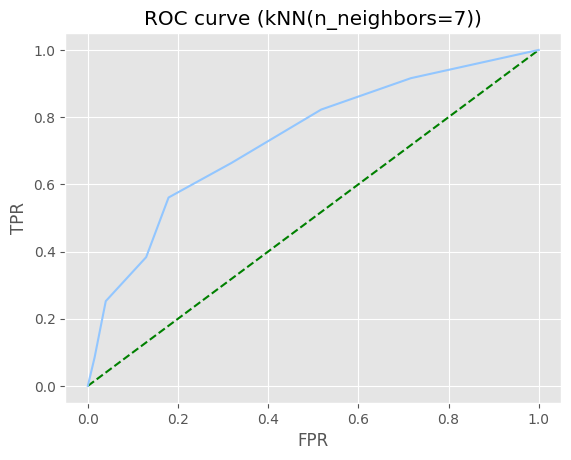

In [118]:
plt.plot([0,1],[0,1],'g--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (kNN(n_neighbors=7))')
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)


0.7345050448691124

In [120]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [121]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [122]:
print("Best Score:" + str(knn_cv.best_score_))

Best Score:0.7578558696205755


In [123]:
print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 14}


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



# Simulasi Model

In [125]:
input_data = np.array([[0,111,65,0,0,24.6,66,70]])
prediction = model.predict(input_data)
print(prediction)

if(prediction[0]==0):
  print ('Pasien tidak terkena diabetes')
else:
  print ('Pasien terkena diabetes')

[0]
Pasien tidak terkena diabetes


#Visualisasi Hasil Algoritma

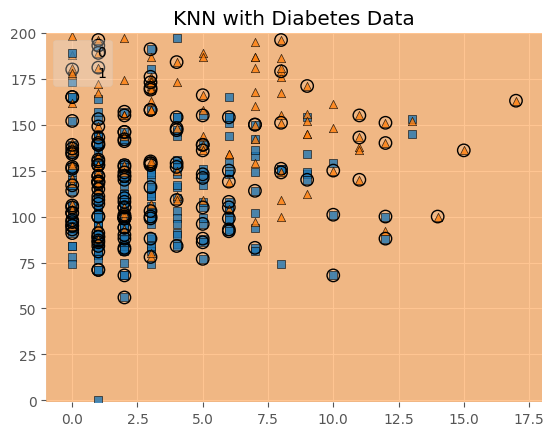

In [126]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=model, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

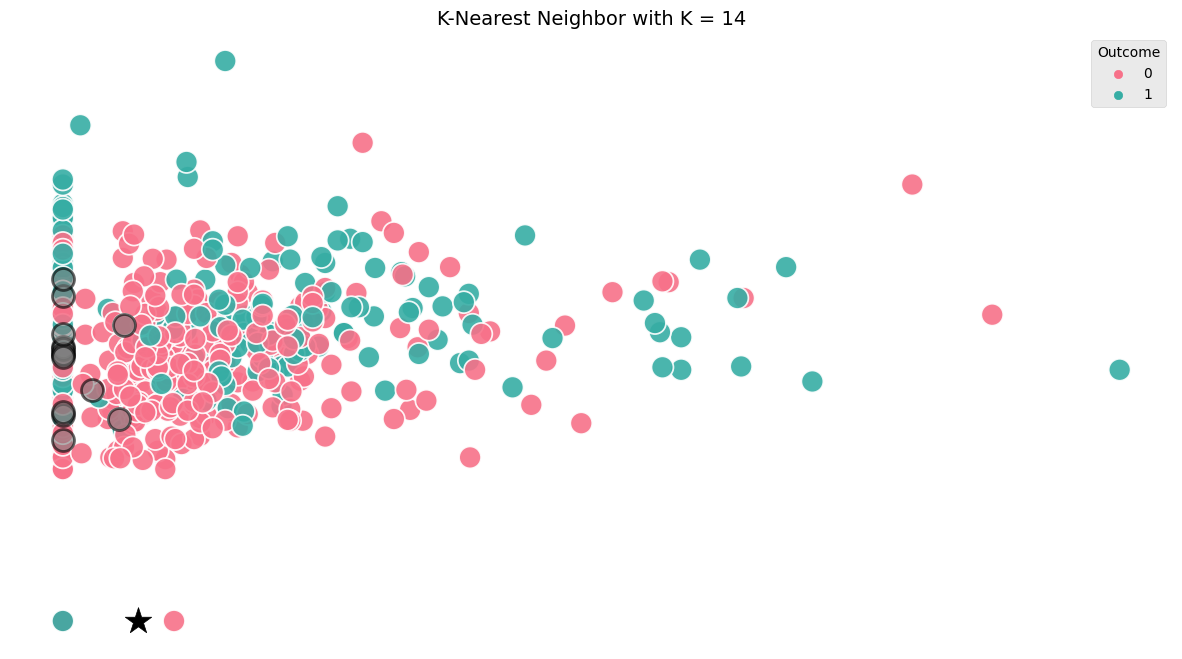

Predictions: 0


In [127]:
import statistics

def knn_algorithm(k, x1, x2):
    euclidean_distance = []

    for i in range(df.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(df.iloc[i].values[:2] - [x1, x2], df.iloc[i].values[:2] - [x1, x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [df.Outcome.iloc[i] for i in index]
    label = statistics.mode(label)

    palette = sns.color_palette("husl", 2)
    colors = {0: palette[0], 1: palette[1]}

    fig, ax = plt.subplots(figsize=(15, 8))
    sns.scatterplot(data=df, x='Insulin', y='BMI', hue='Outcome',
                    alpha=0.9, s=250, palette=palette, ax=ax)

    for i in index:
        target_value = df.Outcome.iloc[i]
        if isinstance(target_value, (int, float)):
            color = colors[int(target_value)]
        else:
            color = 'gray'
        ax.scatter(x=df['Insulin'].iloc[i], y=df['BMI'].iloc[i], s=250, alpha=0.6, linewidth=2, edgecolor='k', color=color)

    ax.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    ax.set_title(label=f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax.set_axis_off()
    plt.show()

    return f'Predictions: {label}'

k_value = 14
x1_value = 60
x2_value = 0

result = knn_algorithm(k_value, x1_value, x2_value)
print(result)

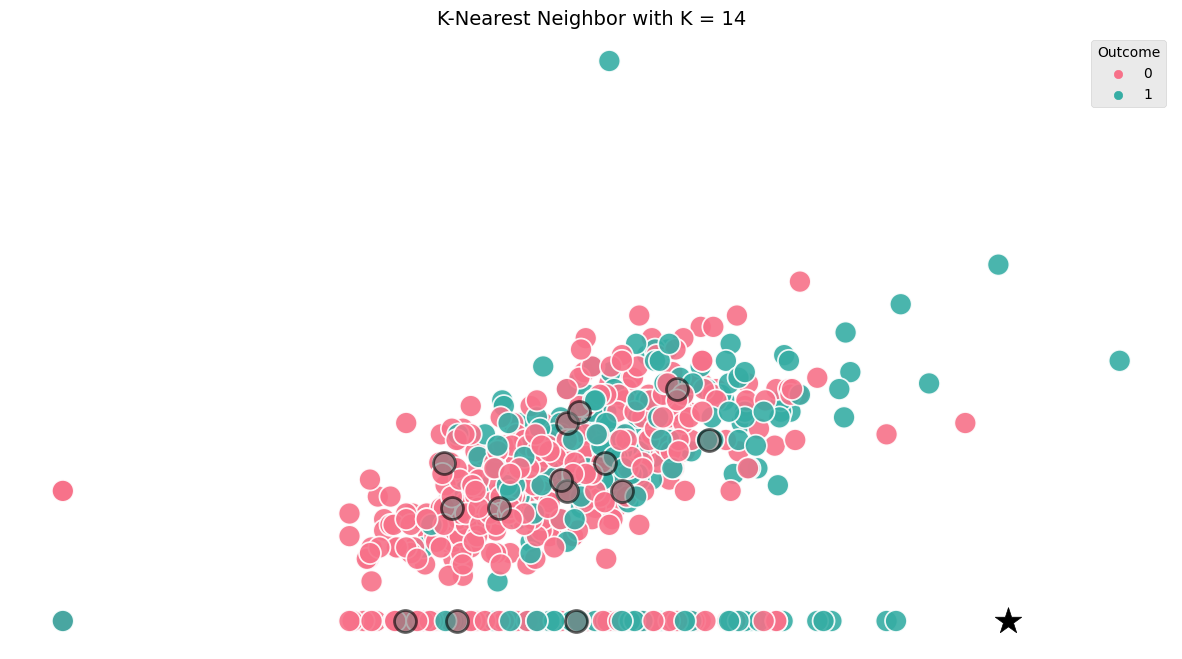

Predictions: 0


In [128]:
import statistics

def knn_algorithm(k, x1, x2):
    euclidean_distance = []

    for i in range(df.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(df.iloc[i].values[:2] - [x1, x2], df.iloc[i].values[:2] - [x1, x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [df.Outcome.iloc[i] for i in index]
    label = statistics.mode(label)

    palette = sns.color_palette("husl", 2)
    colors = {0: palette[0], 1: palette[1]}

    fig, ax = plt.subplots(figsize=(15, 8))
    sns.scatterplot(data=df, x='BMI', y='SkinThickness', hue='Outcome',
                    alpha=0.9, s=250, palette=palette, ax=ax)

    for i in index:
        target_value = df.Outcome.iloc[i]
        if isinstance(target_value, (int, float)):
            color = colors[int(target_value)]
        else:
            color = 'gray'
        ax.scatter(x=df['BMI'].iloc[i], y=df['SkinThickness'].iloc[i], s=250, alpha=0.6, linewidth=2, edgecolor='k', color=color)

    ax.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    ax.set_title(label=f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax.set_axis_off()
    plt.show()

    return f'Predictions: {label}'

k_value = 14
x1_value = 60
x2_value = 0

result = knn_algorithm(k_value, x1_value, x2_value)
print(result)

# Save Model (Pickle)

In [129]:
import pickle

filename ='prediksi_diabetes.sav'
pickle.dump(knn,open(filename,'wb'))